<a href="https://colab.research.google.com/github/19greg96/yolo-onlab/blob/master/onlab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dx, dy 300.0 0.0
newCenterX, newCenterY -52.09445330007909 -295.4423259036624
10 100


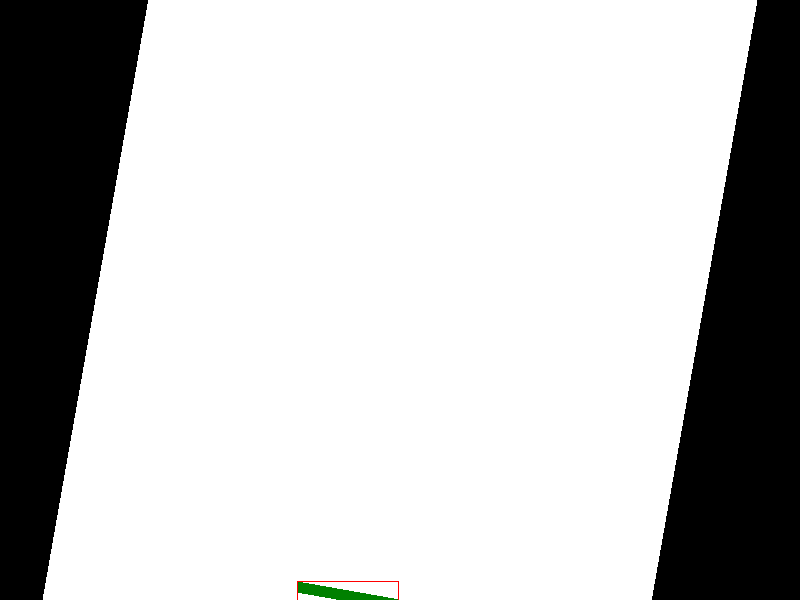

In [0]:
from PIL import Image               # to load images
from PIL import ImageDraw
from IPython.display import display # to display images
import PIL.Image
import math

im_w = 800
im_h = 600
img = PIL.Image.new('RGB', (im_w, im_h), color = 'white')

img_draw = ImageDraw.Draw(img)

box_w = 10
box_h = 100
box_x = im_w / 2 + 300
box_y = im_h / 2

x0 = (box_x - box_w / 2)
y0 = (box_y - box_h / 2)
x1 = (box_x + box_w / 2)
y1 = (box_y + box_h / 2)
img_draw.rectangle([x0, y0, x1, y1], fill='green', outline=None)

angle = -100
img = img.rotate(angle)


dx = box_x - im_w / 2
dy = box_y - im_h / 2
print('dx, dy', dx, dy)
newCenterX = (math.cos(math.radians(angle))*(dx) - math.sin(math.radians(angle))*(dy)); # top right
newCenterY = (math.sin(math.radians(angle))*(dx) + math.cos(math.radians(angle))*(dy));
print('newCenterX, newCenterY', newCenterX, newCenterY)

'''
    x' = x cos θ − y sin θ
    y' = x sin θ + y cos θ
'''
newBoxW1 = abs(math.cos(math.radians(angle))*box_w - math.sin(math.radians(angle))*box_h); # top right
newBoxH1 = abs(math.sin(math.radians(angle))*box_w + math.cos(math.radians(angle))*box_h);

newBoxW2 = abs(math.cos(math.radians(angle))*box_w - math.sin(math.radians(angle))*(-box_h)); # bottom right
newBoxH2 = abs(math.sin(math.radians(angle))*box_w + math.cos(math.radians(angle))*(-box_h));

newBoxW3 = abs(math.cos(math.radians(angle))*-box_w - math.sin(math.radians(angle))*(-box_h)); # bottom left
newBoxH3 = abs(math.sin(math.radians(angle))*-box_w + math.cos(math.radians(angle))*(-box_h));

newBoxW4 = abs(math.cos(math.radians(angle))*-box_w - math.sin(math.radians(angle))*box_h); # top left
newBoxH4 = abs(math.sin(math.radians(angle))*-box_w + math.cos(math.radians(angle))*box_h);

print(box_w, box_h)

newBoxW = max(newBoxW1, newBoxW2, newBoxW3, newBoxW4)
newBoxH = max(newBoxH1, newBoxH2, newBoxH3, newBoxH4)

x0 = (im_w / 2 + newCenterX - newBoxW / 2.0)
y0 = (im_h / 2 - newCenterY - newBoxH / 2.0)
x1 = (im_w / 2 + newCenterX + newBoxW / 2.0)
y1 = (im_h / 2 - newCenterY + newBoxH / 2.0)

img_draw = ImageDraw.Draw(img)
img_draw.rectangle([x0, y0, x1, y1], fill=None, outline='red')

display(img)


In [0]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [1]:
!git clone https://github.com/19greg96/yolo-onlab

Cloning into 'yolo-onlab'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 1987 (delta 20), reused 55 (delta 8), pack-reused 1920
Receiving objects: 100% (1987/1987), 114.71 MiB | 38.44 MiB/s, done.
Resolving deltas: 100% (826/826), done.
Checking out files: 100% (2049/2049), done.


In [44]:
!git reset --hard
!git pull https://github.com/19greg96/yolo-onlab

HEAD is now at e975d79 .
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 5 (delta 4), reused 5 (delta 4), pack-reused 0
Unpacking objects: 100% (5/5), done.
From https://github.com/19greg96/yolo-onlab
 * branch            HEAD       -> FETCH_HEAD
Updating e975d79..26bb5da
Fast-forward
 darknet-master/src/data.c | 16 ++++++++--------
 1 file changed, 8 insertions(+), 8 deletions(-)


In [0]:
!ls

sample_data


In [0]:
import os
os.chdir('yolo-onlab/darknet-master/')

In [0]:
!ls

3rdparty	    image_450.jpg	   src
backup		    image_yolov2.sh	   test_image.jpg
bad.list	    image_yolov3.sh	   test_office2.jpg
build		    include		   test_office_big.jpg
cfg		    json_mjpeg_streams.sh  test_office.jpg
darknet		    LICENSE		   test_scene2.jpg
darknet.dll	    make.bat		   test_scene.jpg
darknet.exe	    Makefile		   video_v2.sh
darknet_no_gpu.dll  net_cam_v3.sh	   video_yolov3.sh
darknet_no_gpu.exe  obj			   voc.names
darknet_onlab.cmd   pthreadGC2.dll	   VOC_SUNRGBD_3
darknet.py	    pthreadVC2.dll	   yolo_cpp_dll.dll
darknet_video.py    README.md		   yolo_cpp_dll_no_gpu.dll
data		    results		   yolo-onlab
data.zip	    scripts


In [45]:
!make GPU=1 OPENCV=1 AVX=1 OPENMP=1

chmod +x *.sh
gcc -Iinclude/  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -ffp-contract=fast -mavx -mavx2 -msse3 -msse4.1 -msse4.2 -msse4a -Ofast -DOPENCV -fopenmp -DGPU -c ./src/data.c -o obj/data.o
./src/data.c: In function ‘load_data_detection’:
./src/data.c:868:30: warning: passing argument 1 of ‘fill_truth_detection’ discards ‘const’ qualifier from pointer target type [-Wdiscarded-qualifiers]
         fill_truth_detection(filename, boxes, d.y.vals[i], classes, angle, flip, dx, dy, 1./sx, 1./sy, small_object, w, h);
                              ^~~~~~~~
./src/data.c:361:6: note: expected ‘char *’ but argument is of type ‘const char *’
 void fill_truth_detection(char *path, int num_boxes, float *truth, int classes, float angle, int flip, float dx, float dy, float sx, float sy,
      ^~~~~~~~~~~~~~~~~~~~
g++ -std=c++11 -Iinclude/  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/c

In [0]:
!wget "https://housebeauty.net/wp-content/uploads/2014/07/Enticing-White-Rom-Interior-Cmbined-with-the-Brown-Wooden-Table-and-Shelf-in-Huelsta-Modern-Wood-Home-Office.jpg" -O test_image.jpg

--2019-04-26 20:02:17--  https://housebeauty.net/wp-content/uploads/2014/07/Enticing-White-Rom-Interior-Cmbined-with-the-Brown-Wooden-Table-and-Shelf-in-Huelsta-Modern-Wood-Home-Office.jpg
Resolving housebeauty.net (housebeauty.net)... 18.221.35.214
Connecting to housebeauty.net (housebeauty.net)|18.221.35.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25445 (25K) [image/jpeg]
Saving to: ‘test_image.jpg’

test_image.jpg      100%[===================>]  24.85K   159KB/s    in 0.2s    

2019-04-26 20:02:18 (159 KB/s) - ‘test_image.jpg’ saved [25445/25445]



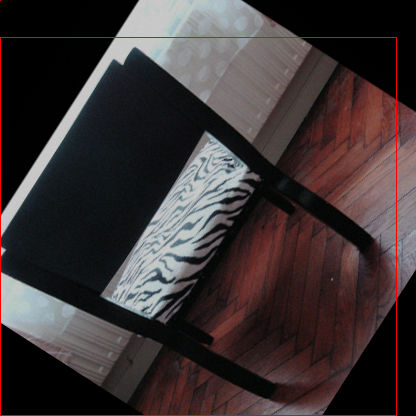

In [51]:
# !./darknet test_img_noise -noise .2
from IPython.display import Image
display(Image('test_image_3.jpg'))

In [50]:
!./darknet test_img_rotate -angle 1

angle: 1.00, ncx: 0.44, ncy: 0.06, x: 0.84, y: 0.21
angle: 1.00, ncx: 0.45, ncy: 0.34, x: 0.61, y: 0.37
angle: 1.00, ncx: 0.30, ncy: 0.37, x: 0.50, y: 0.26
angle: 1.00, ncx: 0.20, ncy: 0.64, x: 0.22, y: 0.32
angle: 1.00, ncx: 0.36, ncy: 0.67, x: 0.29, y: 0.48
angle: 1.00, ncx: 0.67, ncy: 0.67, x: 0.45, y: 0.73
save: test_image_0 data/obj/SUNRGBD_img8213.jpg
angle: 1.00, ncx: 0.47, ncy: 0.47, x: 0.51, y: 0.46
save: test_image_1 data/obj/voc_2009_003489.jpg
angle: 1.00, ncx: 0.20, ncy: 0.82, x: 0.07, y: 0.42
angle: 1.00, ncx: 0.09, ncy: 0.34, x: 0.41, y: 0.07
angle: 1.00, ncx: 0.78, ncy: 0.33, x: 0.80, y: 0.65
angle: 1.00, ncx: 0.14, ncy: 0.70, x: 0.14, y: 0.31
angle: 1.00, ncx: 0.59, ncy: 0.09, x: 0.89, y: 0.35
angle: 1.00, ncx: 0.04, ncy: 0.75, x: 0.04, y: 0.25
angle: 1.00, ncx: 0.68, ncy: 0.23, x: 0.82, y: 0.51
angle: 1.00, ncx: 0.25, ncy: 0.11, x: 0.69, y: 0.08
angle: 1.00, ncx: 0.32, ncy: 0.42, x: 0.47, y: 0.30
angle: 1.00, ncx: -0.05, ncy: 0.58, x: 0.13, y: 0.08
angle: 1.00, ncx: 0

In [48]:
!./darknet test_img_rotate -angle 0
!cp -rf test_image_8.jpg rotate_test/rt_8/0.jpg
!./darknet test_img_rotate -angle 0.1
!cp -rf test_image_8.jpg rotate_test/rt_8/1.jpg
!./darknet test_img_rotate -angle 0.2
!cp -rf test_image_8.jpg rotate_test/rt_8/2.jpg
!./darknet test_img_rotate -angle 0.3
!cp -rf test_image_8.jpg rotate_test/rt_8/3.jpg
!./darknet test_img_rotate -angle 0.4
!cp -rf test_image_8.jpg rotate_test/rt_8/4.jpg
!./darknet test_img_rotate -angle 0.5
!cp -rf test_image_8.jpg rotate_test/rt_8/5.jpg
!./darknet test_img_rotate -angle 0.6
!cp -rf test_image_8.jpg rotate_test/rt_8/6.jpg
!./darknet test_img_rotate -angle 0.7
!cp -rf test_image_8.jpg rotate_test/rt_8/7.jpg
!./darknet test_img_rotate -angle 0.8
!cp -rf test_image_8.jpg rotate_test/rt_8/8.jpg
!./darknet test_img_rotate -angle 0.9
!cp -rf test_image_8.jpg rotate_test/rt_8/9.jpg
!./darknet test_img_rotate -angle 1.0
!cp -rf test_image_8.jpg rotate_test/rt_8/10.jpg
!./darknet test_img_rotate -angle 1.1
!cp -rf test_image_8.jpg rotate_test/rt_8/11.jpg
!./darknet test_img_rotate -angle 1.2
!cp -rf test_image_8.jpg rotate_test/rt_8/12.jpg
!./darknet test_img_rotate -angle 1.3
!cp -rf test_image_8.jpg rotate_test/rt_8/13.jpg
!./darknet test_img_rotate -angle 1.4
!cp -rf test_image_8.jpg rotate_test/rt_8/14.jpg
!./darknet test_img_rotate -angle 1.5
!cp -rf test_image_8.jpg rotate_test/rt_8/15.jpg
!./darknet test_img_rotate -angle 1.6
!cp -rf test_image_8.jpg rotate_test/rt_8/16.jpg
!zip -r rt.zip rotate_test/rt_8/

angle: 0.00, ncx: 0.84, ncy: 0.21, x: 0.84, y: 0.21
angle: 0.00, ncx: 0.61, ncy: 0.37, x: 0.61, y: 0.37
angle: 0.00, ncx: 0.50, ncy: 0.26, x: 0.50, y: 0.26
angle: 0.00, ncx: 0.22, ncy: 0.32, x: 0.22, y: 0.32
angle: 0.00, ncx: 0.29, ncy: 0.48, x: 0.29, y: 0.48
angle: 0.00, ncx: 0.45, ncy: 0.73, x: 0.45, y: 0.73
save: test_image_0 data/obj/SUNRGBD_img8213.jpg
angle: 0.00, ncx: 0.51, ncy: 0.46, x: 0.51, y: 0.46
save: test_image_1 data/obj/voc_2009_003489.jpg
angle: 0.00, ncx: 0.07, ncy: 0.42, x: 0.07, y: 0.42
angle: 0.00, ncx: 0.41, ncy: 0.07, x: 0.41, y: 0.07
angle: 0.00, ncx: 0.80, ncy: 0.65, x: 0.80, y: 0.65
angle: 0.00, ncx: 0.14, ncy: 0.31, x: 0.14, y: 0.31
angle: 0.00, ncx: 0.89, ncy: 0.35, x: 0.89, y: 0.35
angle: 0.00, ncx: 0.04, ncy: 0.25, x: 0.04, y: 0.25
angle: 0.00, ncx: 0.82, ncy: 0.51, x: 0.82, y: 0.51
angle: 0.00, ncx: 0.69, ncy: 0.08, x: 0.69, y: 0.08
angle: 0.00, ncx: 0.47, ncy: 0.30, x: 0.47, y: 0.30
angle: 0.00, ncx: 0.13, ncy: 0.08, x: 0.13, y: 0.08
angle: 0.00, ncx: 0.

In [167]:
!zip -r rt.zip rotate_test/rt_8/

  adding: rotate_test/rt_8/ (stored 0%)
  adding: rotate_test/rt_8/8.jpg (deflated 7%)
  adding: rotate_test/rt_8/15.jpg (deflated 3%)
  adding: rotate_test/rt_8/9.jpg (deflated 7%)
  adding: rotate_test/rt_8/11.jpg (deflated 3%)
  adding: rotate_test/rt_8/7.jpg (deflated 6%)
  adding: rotate_test/rt_8/13.jpg (deflated 3%)
  adding: rotate_test/rt_8/14.jpg (deflated 3%)
  adding: rotate_test/rt_8/2.jpg (deflated 3%)
  adding: rotate_test/rt_8/5.jpg (deflated 5%)
  adding: rotate_test/rt_8/10.jpg (deflated 3%)
  adding: rotate_test/rt_8/4.jpg (deflated 5%)
  adding: rotate_test/rt_8/3.jpg (deflated 4%)
  adding: rotate_test/rt_8/1.jpg (deflated 3%)
  adding: rotate_test/rt_8/12.jpg (deflated 3%)
  adding: rotate_test/rt_8/6.jpg (deflated 5%)
  adding: rotate_test/rt_8/0.jpg (deflated 2%)
  adding: rotate_test/rt_8/16.jpg (deflated 3%)


# Train

In [0]:
!wget https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
!wget https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
!wget https://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar
!tar xf VOCtrainval_11-May-2012.tar
!tar xf VOCtrainval_06-Nov-2007.tar
!tar xf VOCtest_06-Nov-2007.tar
!wget https://pjreddie.com/media/files/voc_label.py
!python voc_label.py
!cat 2007_train.txt 2007_val.txt 2012_*.txt > train.txt

--2019-03-10 12:10:58--  https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/octet-stream]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  47.5MB/s    in 34s     

2019-03-10 12:11:32 (56.4 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]

--2019-03-10 12:11:33--  https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/octet-stream]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M  52.7MB/s    in 9.1s    

2019-03-10 12:11:43 (48.1 MB/s) 

In [0]:
!ls  data

9k.tree      goal.txt		       onlab.names	  test_onlab.txt
coco9k.map   horses.jpg		       onlab_nocat.names  train_onlab.txt
coco.names   imagenet.labels.list      openimages.names   voc.names
dog.jpg      imagenet.shortnames.list  person.jpg	  VOC_SUNRGBD_3
eagle.jpg    labels		       readme.txt
giraffe.jpg  obj		       scream.jpg


In [0]:
!rm -rf data/obj/
!rm data/test_onlab.txt
!rm data/train_onlab.txt
!rm data.zip
!ls data/

rm: cannot remove 'data/test_onlab.txt': No such file or directory
rm: cannot remove 'data/train_onlab.txt': No such file or directory
rm: cannot remove 'data.zip': No such file or directory
9k.tree     eagle.jpg	 imagenet.labels.list	   onlab_nocat.names  voc.names
coco9k.map  giraffe.jpg  imagenet.shortnames.list  openimages.names
coco.names  goal.txt	 labels			   person.jpg
dog.jpg     horses.jpg	 onlab.names		   scream.jpg


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

!ls "../../gdrive/My Drive/projects/"
!cp "../../gdrive/My Drive/projects/VOC_SUNRGBD_3.zip" "data.zip"
!unzip -q data.zip -d ./

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
backup.zip  si		       yolo3-tiny-onlab_nocat_last.weights
index.png   VOC_SUNRGBD_3.zip


In [0]:
!mv ./VOC_SUNRGBD_3/* ./data/

In [0]:
!cp "../../gdrive/My Drive/projects/yolo3-tiny-onlab_nocat_last.weights" "backup/yolo3-tiny-onlab_nocat_last.weights"

# Train YoloV3 Tiny

In [0]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

--2019-04-06 17:57:50--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  14.3MB/s    in 2.4s    

2019-04-06 17:57:54 (14.3 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



In [0]:
!./darknet partial cfg/yolov3-tiny.cfg yolov3-tiny.weights yolov3-tiny.conv.15 15

layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16 0.150 BF
   1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16 0.003 BF
   2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32 0.399 BF
   3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32 0.001 BF
   4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64 0.399 BF
   5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128 0.399 BF
   7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128 0.000 BF
   8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256 0.399 BF
   9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512 0.399 BF
  11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512 0.000 

In [0]:
!./darknet detector train cfg/onlab_nocat.data cfg/yolo3-tiny-onlab_nocat.cfg backup/yolo3-tiny-onlab_nocat_last.weights -map -dont_show

 Prepare additional network for mAP calculation...
layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16 0.150 BF
   1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16 0.003 BF
   2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32 0.399 BF
   3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32 0.001 BF
   4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64 0.399 BF
   5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128 0.399 BF
   7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128 0.000 BF
   8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256 0.399 BF
   9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512 0.399 BF
  11 max          2 x 2 

In [0]:
!ls backup/

sample_images_nuc		      yolo3-tiny-onlab_nocat_17000.weights
sample_images_win		      yolo3-tiny-onlab_nocat_18000.weights
tests				      yolo3-tiny-onlab_nocat_19000.weights
yolo3-tiny-onlab_nocat_10000.weights  yolo3-tiny-onlab_nocat_6000.weights
yolo3-tiny-onlab_nocat_11000.weights  yolo3-tiny-onlab_nocat_7000.weights
yolo3-tiny-onlab_nocat_12000.weights  yolo3-tiny-onlab_nocat_8000.weights
yolo3-tiny-onlab_nocat_13000.weights  yolo3-tiny-onlab_nocat_9000.weights
yolo3-tiny-onlab_nocat_14000.weights  yolo3-tiny-onlab_nocat_last.weights
yolo3-tiny-onlab_nocat_15000.weights  yolov3-tiny.weights
yolo3-tiny-onlab_nocat_16000.weights


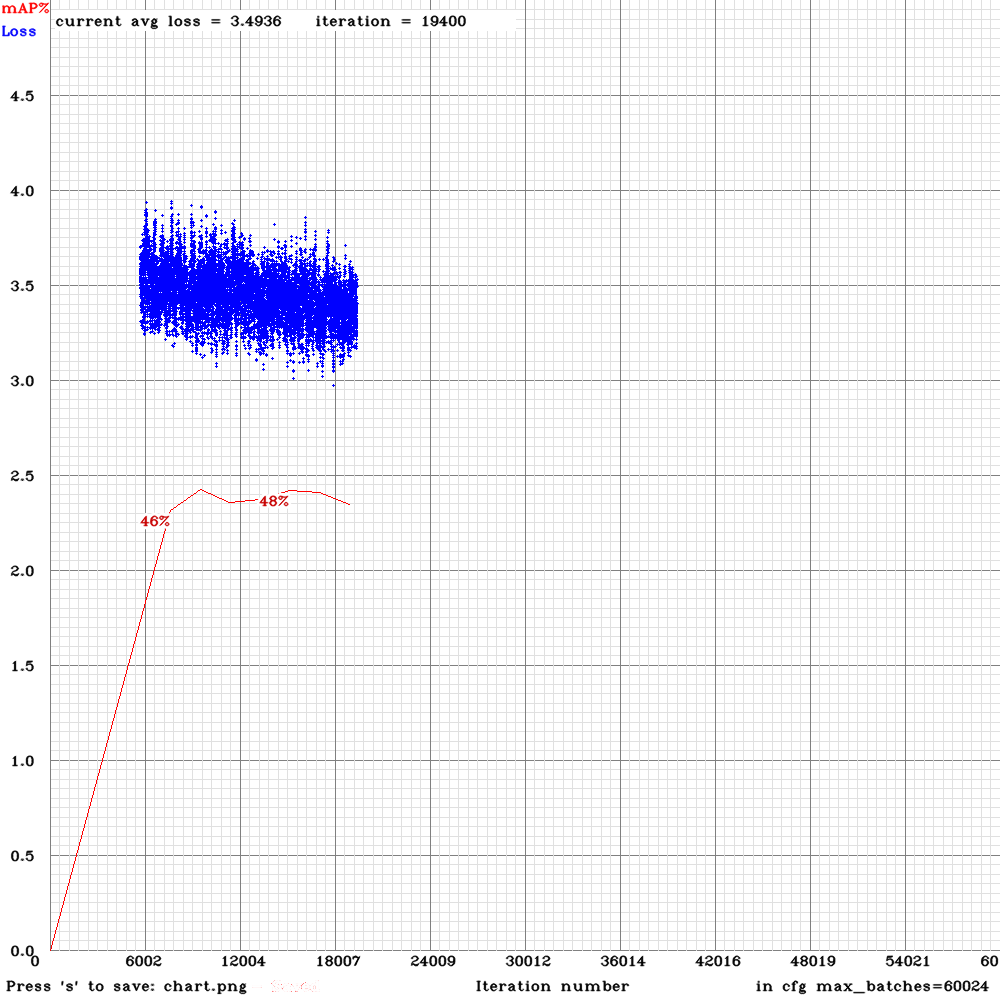

In [0]:
from IPython.display import Image
Image('chart.png')

In [0]:
!zip -r backup.zip backup

  adding: backup/ (stored 0%)
  adding: backup/yolo3-tiny-onlab_nocat_12000.weights (deflated 7%)
  adding: backup/yolo3-tiny-onlab_nocat_13000.weights (deflated 7%)
  adding: backup/yolo3-tiny-onlab_nocat_10000.weights (deflated 7%)
  adding: backup/sample_images_win/ (stored 0%)
  adding: backup/sample_images_win/image_135.jpg (deflated 1%)
  adding: backup/sample_images_win/image_255.jpg (deflated 2%)
  adding: backup/sample_images_win/image_225.jpg (deflated 1%)
  adding: backup/sample_images_win/image_150.jpg (deflated 1%)
  adding: backup/sample_images_win/image_210.jpg (deflated 1%)
  adding: backup/sample_images_win/image_375.jpg (deflated 2%)
  adding: backup/sample_images_win/image_120.jpg (deflated 1%)
  adding: backup/sample_images_win/image_450.jpg (deflated 1%)
  adding: backup/sample_images_win/image_360.jpg (deflated 1%)
  adding: backup/sample_images_win/image_15.jpg (deflated 2%)
  adding: backup/sample_images_win/image_75.jpg (deflated 1%)
  adding: backup/sample_ima

In [0]:
!cp "backup.zip" "../../gdrive/My Drive/projects/backup.zip"

backup.zip# Run

In [0]:
!wget "https://cdn1.npcdn.net/image/144473068096f2cb905254de961e6e70c9bef9eaa6.jpg?md5id=0006aabe0ba47a35c0b0bf6596f85159&new_width=950&new_height=2500&w=1466647023" -O test_office.jpg

--2019-04-07 19:34:12--  https://cdn1.npcdn.net/image/144473068096f2cb905254de961e6e70c9bef9eaa6.jpg?md5id=0006aabe0ba47a35c0b0bf6596f85159&new_width=950&new_height=2500&w=1466647023
Resolving cdn1.npcdn.net (cdn1.npcdn.net)... 104.25.58.26, 104.25.59.26, 2606:4700:20::6819:3a1a, ...
Connecting to cdn1.npcdn.net (cdn1.npcdn.net)|104.25.58.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘test_office.jpg’

test_office.jpg         [ <=>                ]  29.97K  --.-KB/s    in 0.006s  

2019-04-07 19:34:12 (4.58 MB/s) - ‘test_office.jpg’ saved [30691]



In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

!ls "/content/gdrive/My Drive/projects/"
!cp "/content/gdrive/My Drive/projects/backup.zip" "backup.zip"
!unzip backup.zip -d ./

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
backup.zip  si
Archive:  backup.zip
  inflating: ./backup/yolo3-tiny-onlab_nocat_3000.weights  
  inflating: ./backup/yolo3-tiny-onlab_nocat_10000.weights  
  inflating: ./backup/yolo3-tiny-onlab_nocat_1000.weights  
  inflating: ./backup/yolo3-tiny-onlab_nocat_2000.weights  
  inflating: ./backup/yolo3-tiny-onlab_nocat_4000.weights  
  inflating: ./backup/yolo3-tiny-onlab_nocat_7000.weights  
  inflating: ./backup/yolo3-tiny-onlab_nocat_5000.weights  
  infl

In [0]:
!./darknet detector test cfg/onlab_nocat.data cfg/yolo3-tiny-onlab_nocat_test.cfg backup/yolo3-tiny-onlab_nocat_last.weights test_office.jpg -thresh 0.1

layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16 0.150 BF
   1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16 0.003 BF
   2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32 0.399 BF
   3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32 0.001 BF
   4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64 0.399 BF
   5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128 0.399 BF
   7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128 0.000 BF
   8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256 0.399 BF
   9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512 0.399 BF
  11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512 0.000 

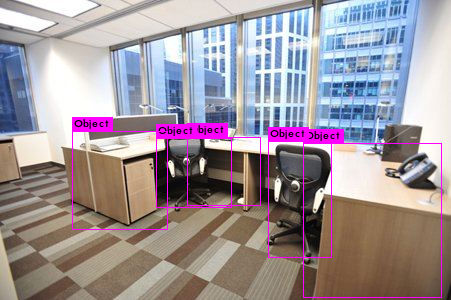

In [0]:
from IPython.display import Image
Image('predictions.jpg')

In [0]:
import importlib
import darknet
importlib.reload(darknet)
import time


weights = "backup/yolo3-tiny-onlab_nocat_8000.weights"
config = "cfg/yolo3-tiny-onlab_nocat_test.cfg"
data_cfg = "cfg/onlab_nocat.data"
image = "test_office.jpg"
# image = "data/dog.jpg"

startTime = time.perf_counter()
# Initialize network, so init doesn't count in performance measurement
darknet.performDetect(imagePath=image, thresh=0.1, configPath = config, weightPath = weights, metaPath= data_cfg, showImage= False, makeImageOnly = False, initOnly= True)
initTime = time.perf_counter() - startTime

nImage = 20
startTime = time.perf_counter()
for x in range(0, nImage):
  detections = darknet.performDetect(imagePath=image, thresh=0.1, configPath = config, weightPath = weights, metaPath= data_cfg, showImage= False, makeImageOnly = False, initOnly= False)

detectTime = time.perf_counter() - startTime

print("Init time", initTime, "Detect time", detectTime * 1000 / nImage, "[ms/image]")

ModuleNotFoundError: ignored

# NNPACK tests

In [0]:
!sudo pip install --upgrade git+https://github.com/Maratyszcza/PeachPy
!sudo pip install --upgrade git+https://github.com/Maratyszcza/confu
!git clone https://github.com/ninja-build/ninja.git
import os
os.chdir('ninja/')
!git checkout release
!./configure.py --bootstrap
!export NINJA_PATH=$PWD

import os
os.chdir('../')

!git clone https://github.com/digitalbrain79/NNPACK-darknet.git

import os
os.chdir('NNPACK-darknet/')

!confu setup
!python ./configure.py --backend auto
!../ninja/ninja
!sudo cp -a lib/* /usr/lib/
!sudo cp include/nnpack.h /usr/include/
!sudo cp deps/pthreadpool/include/pthreadpool.h /usr/include/

  Cloning https://github.com/Maratyszcza/PeachPy to /tmp/pip-req-build-_o6q270a
  Stored in directory: /tmp/pip-ephem-wheel-cache-b3g92bhc/wheels/2c/0a/07/60382d9a019eaa87ff92878a74ef8277d20e3d0a9aacb52e88
Successfully built PeachPy
  Cloning https://github.com/Maratyszcza/confu to /tmp/pip-req-build-dlutl8xv
  Stored in directory: /tmp/pip-ephem-wheel-cache-_3l3h4q2/wheels/bd/d8/19/29e4e955cd80d8f4b2e01afed8a0d81012288b145446c12db5
  Stored in directory: /root/.cache/pip/wheels/c1/96/38/b35a796a4a603bf4f4c9aa2e05feba5d40a4022cbb03ca262c
Successfully built confu ninja-syntax
Cloning into 'ninja'...
remote: Enumerating objects: 10128, done.
remote: Total 10128 (delta 0), reused 0 (delta 0), pack-reused 10128
Receiving objects: 100% (10128/10128), 3.56 MiB | 3.96 MiB/s, done.
Resolving deltas: 100% (7199/7199), done.
Branch 'release' set up to track remote branch 'release' from 'origin'.
Switched to a new branch 'release'
bootstrapping ninja...
wrote build.ninja.
bootstrap complete.  reb

In [0]:
import os
os.chdir('../')
!git clone https://github.com/digitalbrain79/darknet-nnpack.git
import os
os.chdir('darknet-nnpack/')

Cloning into 'darknet-nnpack'...
remote: Enumerating objects: 6048, done.
remote: Total 6048 (delta 0), reused 0 (delta 0), pack-reused 6048
Receiving objects: 100% (6048/6048), 6.25 MiB | 3.88 MiB/s, done.
Resolving deltas: 100% (4043/4043), done.


In [0]:
!make GPU=0 OPENCV=1 OPENMP=1 ARM_NEON=0

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DNNPACK -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -DOPENCV -DNNPACK -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DNNPACK -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -DOPENCV -DNNPACK -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DNNPACK -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -DOPENCV -DNNPACK -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DNNPACK -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -DOPENCV -DNNPACK -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DNNPACK -Wall -Wno-unused-result -Wno-unknown-pragma

In [0]:
!wget "https://raw.githubusercontent.com/19greg96/yolo-onlab/master/darknet-master/cfg/onlab_nocat.data" -O cfg/onlab_nocat.data
!wget "https://raw.githubusercontent.com/19greg96/yolo-onlab/master/darknet-master/cfg/yolo3-tiny-onlab_nocat_test.cfg" -O cfg/yolo3-tiny-onlab_nocat_test.cfg
!wget "https://raw.githubusercontent.com/19greg96/yolo-onlab/master/darknet-master/data/onlab_nocat.names" -O data/onlab_nocat.names

--2019-03-10 11:27:41--  https://raw.githubusercontent.com/19greg96/yolo-onlab/master/darknet-master/cfg/onlab_nocat.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118 [text/plain]
Saving to: ‘cfg/onlab_nocat.data’

cfg/onlab_nocat.dat 100%[===================>]     118  --.-KB/s    in 0s      

2019-03-10 11:27:41 (19.7 MB/s) - ‘cfg/onlab_nocat.data’ saved [118/118]

--2019-03-10 11:27:43--  https://raw.githubusercontent.com/19greg96/yolo-onlab/master/darknet-master/cfg/yolo3-tiny-onlab_nocat_test.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response...

In [0]:
!./darknet detector test cfg/onlab_nocat.data cfg/yolo3-tiny-onlab_nocat_test.cfg backup/yolo3-tiny-onlab_nocat_8000.weights data/person.jpg

layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   288 x 288 x   3   ->   288 x 288 x  16  0.072 BFLOPs
    1 max          2 x 2 / 2   288 x 288 x  16   ->   144 x 144 x  16
    2 conv     32  3 x 3 / 1   144 x 144 x  16   ->   144 x 144 x  32  0.191 BFLOPs
    3 max          2 x 2 / 2   144 x 144 x  32   ->    72 x  72 x  32
    4 conv     64  3 x 3 / 1    72 x  72 x  32   ->    72 x  72 x  64  0.191 BFLOPs
    5 max          2 x 2 / 2    72 x  72 x  64   ->    36 x  36 x  64
    6 conv    128  3 x 3 / 1    36 x  36 x  64   ->    36 x  36 x 128  0.191 BFLOPs
    7 max          2 x 2 / 2    36 x  36 x 128   ->    18 x  18 x 128
    8 conv    256  3 x 3 / 1    18 x  18 x 128   ->    18 x  18 x 256  0.191 BFLOPs
    9 max          2 x 2 / 2    18 x  18 x 256   ->     9 x   9 x 256
   10 conv    512  3 x 3 / 1     9 x   9 x 256   ->     9 x   9 x 512  0.191 BFLOPs
   11 max          2 x 2 / 1     9 x   9 x 512   ->     9 x   9 x 512
   12 con

# OpenCL tests

In [0]:
!clinfo

Number of platforms                               1
  Platform Name                                   NVIDIA CUDA
  Platform Vendor                                 NVIDIA Corporation
  Platform Version                                OpenCL 1.2 CUDA 10.0.211
  Platform Profile                                FULL_PROFILE
  Platform Extensions                             cl_khr_global_int32_base_atomics cl_khr_global_int32_extended_atomics cl_khr_local_int32_base_atomics cl_khr_local_int32_extended_atomics cl_khr_fp64 cl_khr_byte_addressable_store cl_khr_icd cl_khr_gl_sharing cl_nv_compiler_options cl_nv_device_attribute_query cl_nv_pragma_unroll cl_nv_copy_opts cl_nv_create_buffer
  Platform Extensions function suffix             NV

  Platform Name                                   NVIDIA CUDA
Number of devices                                 1
  Device Name                                     Tesla K80
  Device Vendor                                   NVIDIA Corporation
  Device Vendor

In [0]:
!sudo apt-get install libclblas2 clblas-client libclblas-dev catch

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libclblas-doc
The following NEW packages will be installed:
  catch clblas-client libclblas-dev libclblas2
0 upgraded, 4 newly installed, 0 to remove and 10 not upgraded.
Need to get 1,101 kB of archives.
After this operation, 24.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 catch amd64 1.10.0-1 [113 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libclblas2 amd64 2.12-1build1 [838 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 clblas-client amd64 2.12-1build1 [124 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libclblas-dev amd64 2.12-1build1 [26.1 kB]
Fetched 1,101 kB in 0s (9,519 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/

In [0]:
!git clone https://github.com/sowson/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 6130, done.
remote: Total 6130 (delta 0), reused 0 (delta 0), pack-reused 6130
Receiving objects: 100% (6130/6130), 6.20 MiB | 6.65 MiB/s, done.
Resolving deltas: 100% (4144/4144), done.


In [0]:
import os
os.chdir('darknet/')

In [0]:
!wget "https://raw.githubusercontent.com/19greg96/yolo-onlab/master/darknet-master/cfg/onlab_nocat.data" -O cfg/onlab_nocat.data
!wget "https://raw.githubusercontent.com/19greg96/yolo-onlab/master/darknet-master/data/onlab_nocat.names" -O data/onlab_nocat.names
!wget "https://raw.githubusercontent.com/19greg96/yolo-onlab/master/darknet-master/cfg/yolo3-tiny-onlab_nocat.cfg" -O cfg/yolo3-tiny-onlab_nocat.cfg

--2019-03-04 20:11:07--  https://raw.githubusercontent.com/19greg96/yolo-onlab/master/darknet-master/cfg/onlab_nocat.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118 [text/plain]
Saving to: ‘cfg/onlab_nocat.data’

cfg/onlab_nocat.dat 100%[===================>]     118  --.-KB/s    in 0s      

2019-03-04 20:11:07 (16.5 MB/s) - ‘cfg/onlab_nocat.data’ saved [118/118]

--2019-03-04 20:11:08--  https://raw.githubusercontent.com/19greg96/yolo-onlab/master/darknet-master/data/onlab_nocat.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Lengt

In [0]:
!wget "https://pastebin.com/raw/eTFUtgdh" -O Makefile

--2019-03-04 20:11:22--  https://pastebin.com/raw/eTFUtgdh
Resolving pastebin.com (pastebin.com)... 104.20.208.21, 104.20.209.21, 2606:4700:10::6814:d115, ...
Connecting to pastebin.com (pastebin.com)|104.20.208.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘Makefile’

Makefile                [ <=>                ]   4.10K  --.-KB/s    in 0s      

2019-03-04 20:11:22 (39.1 MB/s) - ‘Makefile’ saved [4202]



In [0]:
!mkdir obj

In [0]:
!make darknet OPENCV=1

gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -DOPENCL -DGPU_FAST -Wall -Wno-unknown-pragmas -Wno-unused-variable -Wfatal-errors -fPIC -ffp-contract=fast -mavx -mavx2 -msse3 -msse4.1 -msse4.2 -msse4a -O2 -DOPENCV -DGPU -DOPENCL -I/usr/include/ -I/usr/local/cuda/include/ -DGPU_FAST -c ./examples/captcha.c -o obj/captcha.o
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -DOPENCL -DGPU_FAST -Wall -Wno-unknown-pragmas -Wno-unused-variable -Wfatal-errors -fPIC -ffp-contract=fast -mavx -mavx2 -msse3 -msse4.1 -msse4.2 -msse4a -O2 -DOPENCV -DGPU -DOPENCL -I/usr/include/ -I/usr/local/cuda/include/ -DGPU_FAST -c ./examples/lsd.c -o obj/lsd.o
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -DOPENCL -DGPU_FAST -Wall -Wno-unknown-pragmas -Wno-unused-variable -Wfatal-errors -fPIC -ffp-contract=fast -mavx -mavx2 -msse3 -msse4.1 -msse4.2 -msse4a -O2 -DOPENCV -DGPU -DOPENCL -I/usr/include/ -I/usr/local/cuda/include/ -DGPU_FAST -c ./examples/sup

In [0]:
!ls

arapaho  CMakeLists.txt  data	  Makefile  README.md  src
cfg	 darknet	 LICENSE  obj	    scripts


In [0]:
!apt-get install dos2unix

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  dos2unix
0 upgraded, 1 newly installed, 0 to remove and 10 not upgraded.
Need to get 351 kB of archives.
After this operation, 1,267 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 dos2unix amd64 7.3.4-3 [351 kB]
Fetched 351 kB in 2s (174 kB/s)
Selecting previously unselected package dos2unix.
(Reading database ... 131322 files and directories currently installed.)
Preparing to unpack .../dos2unix_7.3.4-3_amd64.deb ...
Unpacking dos2unix (7.3.4-3) ...
Setting up dos2unix (7.3.4-3) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [0]:
!dos2unix cfg/yolo3-tiny-onlab_nocat.cfg

dos2unix: converting file cfg/yolo3-tiny-onlab_nocat_test.cfg to Unix format...


In [0]:
!./darknet detector test cfg/onlab_nocat.data cfg/yolo3-tiny-onlab_nocat.cfg backup/yolo3-tiny-onlab_nocat_8000.weights data/dog.jpg -thresh 0.1

Device ID: 0
Device name: Tesla K80
Device vendor: NVIDIA Corporation
Device opencl availability: OpenCL 1.2 CUDA
Device opencl used: 410.79
Device double precision: YES
Device max group size: 1024
Device address bits: 64
layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max  

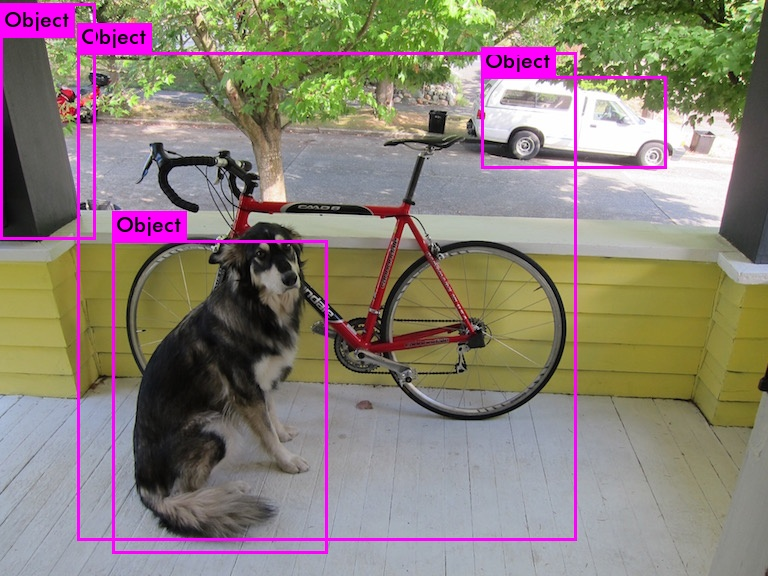

In [0]:
from IPython.display import Image
Image('predictions.jpg')

In [0]:
cd ~/YoloObjectDetect/darknet_cuda/darknet-master/
./darknet detector test cfg/onlab_nocat.data cfg/yolo3-tiny-onlab_nocat.cfg backup/yolo3-tiny-onlab_nocat_8000.weights test_office.jpg -thresh 0.1
cd ~/YoloObjectDetect/darknet_opencl/
./darknet detector test cfg/onlab_nocat.data cfg/yolo3-tiny-onlab_nocat.cfg backup/yolo3-tiny-onlab_nocat_8000.weights test_office.jpg -thresh 0.1